# data cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv('Salary_Data.csv')
data.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [ ]:
data.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [ ]:
# DATA IMPUTATION
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Salary'] = data['Salary'].fillna(data['Salary'].mean())
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Job Title'] = data['Job Title'].fillna(data['Job Title'].mode()[0])
data['Education Level'] = data['Education Level'].fillna(data['Education Level'].mode()[0])
data['Years of Experience'] = data['Years of Experience'].fillna(data['Years of Experience'].mean())

data.isnull().sum()


,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [ ]:
data.duplicated().sum()

np.int64(4912)

In [ ]:
# handling duplicated data
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

In [ ]:
data = data.drop('Job Title', axis=1)
data.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,45.0,Male,PhD,15.0,150000.0
3,36.0,Female,Bachelor's,7.0,60000.0
4,52.0,Male,Master's,20.0,200000.0


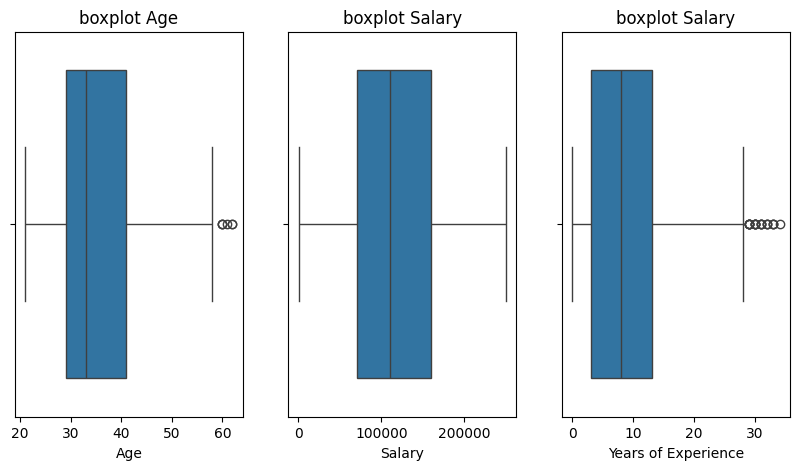

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(x=data['Age'])
plt.title('boxplot Age')

plt.subplot(1,3,2)
sns.boxplot(x=data['Salary'])
plt.title('boxplot Salary')

plt.subplot(1,3,3)
sns.boxplot(x=data['Years of Experience'])
plt.title('boxplot Salary')

plt.show()


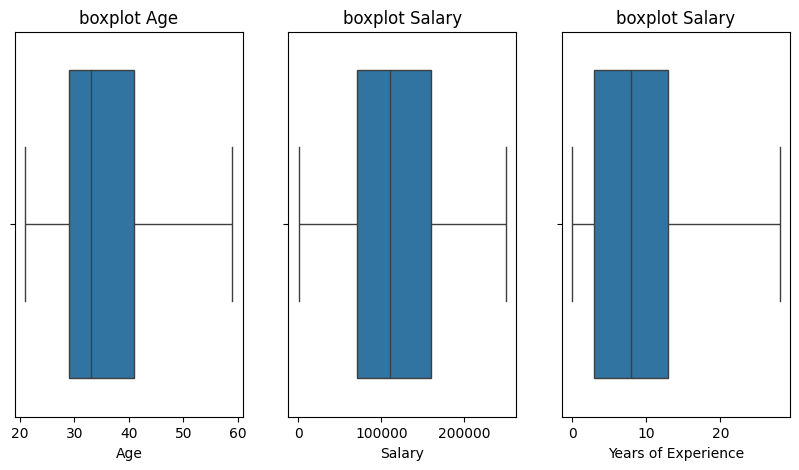

In [ ]:
import numpy as np

cols_to_cap = ['Age', 'Years of Experience']

for col in cols_to_cap:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(x=data['Age'])
plt.title('boxplot Age')

plt.subplot(1,3,2)
sns.boxplot(x=data['Salary'])
plt.title('boxplot Salary')

plt.subplot(1,3,3)
sns.boxplot(x=data['Years of Experience'])
plt.title('boxplot Salary')

plt.show()

# EDA

In [ ]:
data.describe()

,Age,Years of Experience,Salary
count,1792.000000,1792.000000,1792.000000
mean,35.121440,9.117293,113182.084185
std,8.188608,6.732298,51525.505743
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,59.000000,28.000000,250000.000000


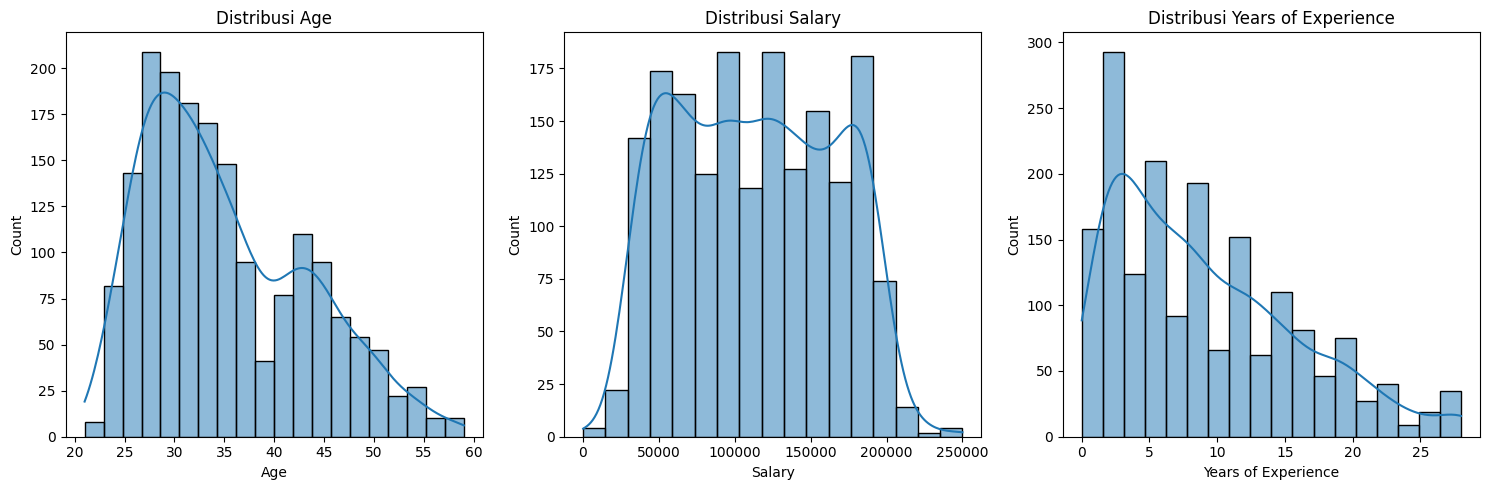

In [ ]:
# Histograms for numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Distribusi Age')

plt.subplot(1, 3, 2)
sns.histplot(data['Salary'], kde=True)
plt.title('Distribusi Salary')

plt.subplot(1, 3, 3)
sns.histplot(data['Years of Experience'], kde=True)
plt.title('Distribusi Years of Experience')
plt.tight_layout()
plt.show()



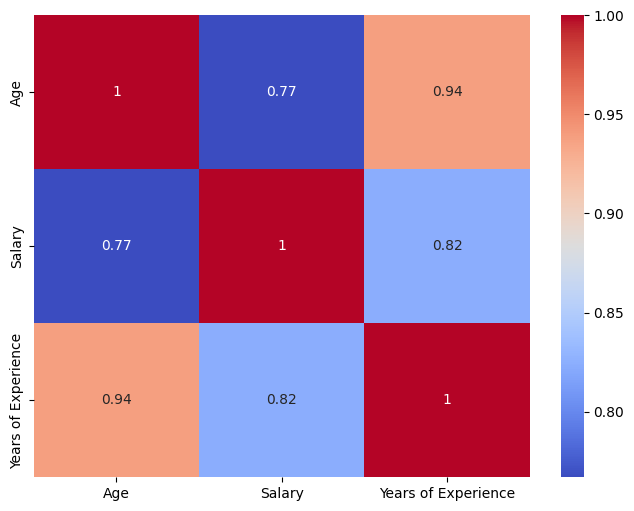

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Age', 'Salary', 'Years of Experience']].corr(), annot=True, cmap='coolwarm')

plt.show()

# feature engineering

In [ ]:
data.head(5)

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,45.0,Male,PhD,15.0,150000.0
3,36.0,Female,Bachelor's,7.0,60000.0
4,52.0,Male,Master's,20.0,200000.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Education Level'
le = LabelEncoder()
data['Education Level'] = le.fit_transform(data['Education Level'])
data['Gender'] = le.fit_transform(data['Gender'])

data.head(5)

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1,0,5.0,90000.0
1,28.0,0,3,3.0,65000.0
2,45.0,1,5,15.0,150000.0
3,36.0,0,0,7.0,60000.0
4,52.0,1,3,20.0,200000.0


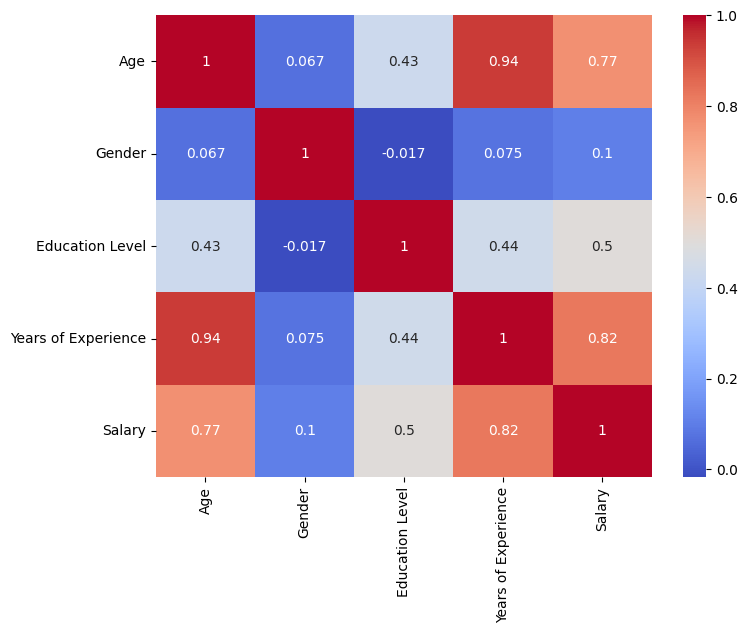

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Age', 'Gender', 'Education Level','Years of Experience','Salary']].corr(), annot=True, cmap='coolwarm')

plt.show()

In [ ]:
x= data[['Age','Gender','Education Level','Years of Experience']]  # features
y = data['Salary']  # target

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred_lr = lr_model.predict(x_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Linear Regression RMSE: 26906.79
R-squared (R2): 0.71


In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)
r2 = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"Decision Tree Regressor RMSE: {rmse_dt:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Decision Tree Regressor RMSE: 21594.49
R-squared (R2): 0.81


In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)
r2 = r2_score(y_test, y_pred_rf)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest Regressor RMSE: {rmse_rf:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Random Forest Regressor RMSE: 20029.22
R-squared (R2): 0.84
